Submitted by ***Deepak***

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/dataset_model.csv")
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Problem 1-** Identify & Remove the field that is providing only unique information about records .Capture it in another dataframe

In [0]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df.shape

(614, 13)

In [0]:
df['Loan_ID'].unique().size


614

In [0]:
df['Gender'].unique().size


3

In [0]:
df['Education'].unique().size

2

In [0]:
df['Self_Employed'].unique().size


3

In [0]:
df['ApplicantIncome'].unique().size

505

In [0]:
df.drop('Loan_ID', axis=1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Problem 2-** Identifying Continous & Categorical Columns

***Categorical Columns***

In [0]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [0]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [0]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [0]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [0]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

***Continous Columns***

In [0]:
len(df['Loan_ID'].unique())

614

In [0]:
len(df['Dependents'].unique())

5

In [0]:
len(df['ApplicantIncome'].unique())

505

In [0]:
len(df['CoapplicantIncome'].unique())

287

In [0]:
len(df['LoanAmount'].unique())

204

In [0]:
len(df['Loan_Amount_Term'].unique())

11

In [0]:
len(df['Credit_History'].unique())

3

**Problem 3-** Performing Uni-variate Analysis with Plots.Record your Observations

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b3458c5c0>


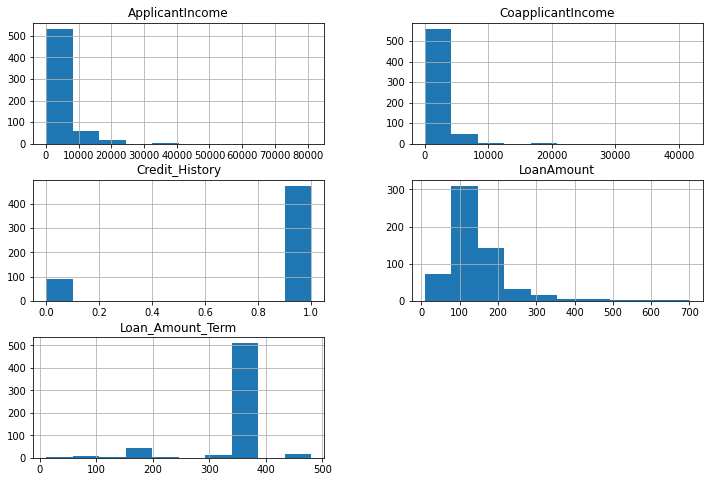

In [0]:
a=df.hist(figsize=[12,8])
print(a)

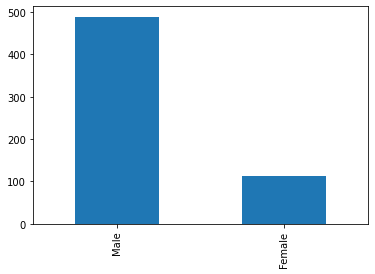

In [0]:
df['Gender'].value_counts().plot.bar()

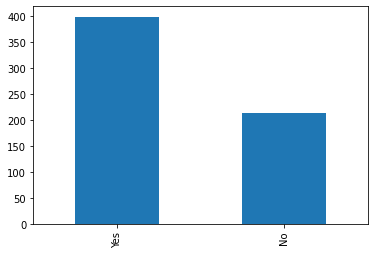

In [0]:
df['Married'].value_counts().plot.bar()

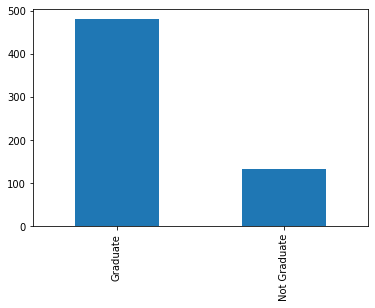

In [0]:
df['Education'].value_counts().plot.bar()

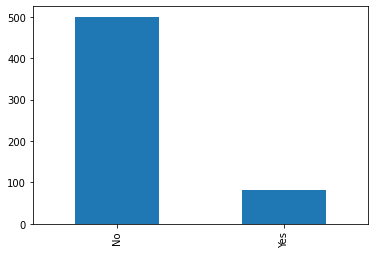

In [0]:
df['Self_Employed'].value_counts().plot.bar()

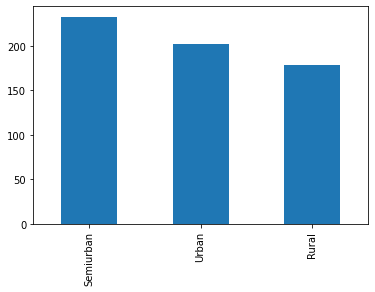

In [0]:
df['Property_Area'].value_counts().plot.bar()

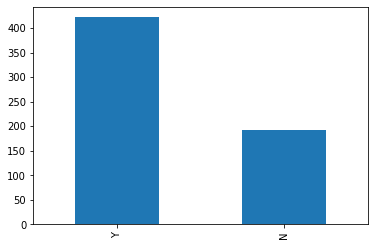

In [0]:
df['Loan_Status'].value_counts().plot.bar()

**Problem 4-** Perform Bi-variate Analysis among all Independent variables.Draw appropriate Plots , mention observations

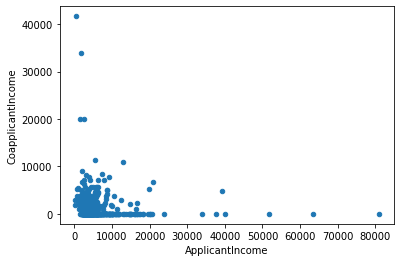

In [0]:
df.plot.scatter(x='ApplicantIncome', y='CoapplicantIncome')

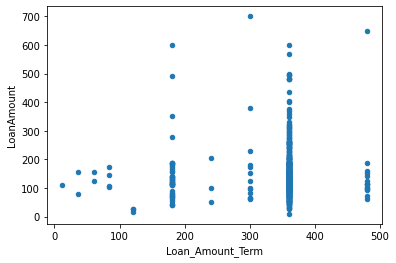

In [0]:
df.plot.scatter(x='Loan_Amount_Term', y='LoanAmount')

**Problem 5-** Perform Bi-variate Analysis between Target Variable and each Independent variable. Use suitable plot , mention observations,trends etc

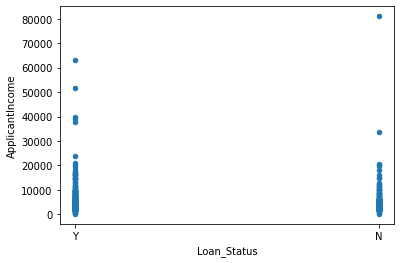

In [0]:
df.plot.scatter(x='Loan_Status', y='ApplicantIncome')

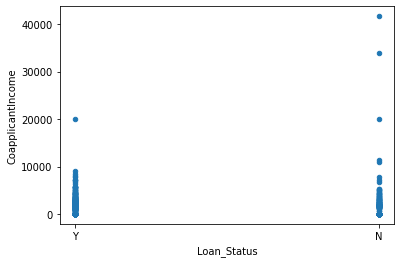

In [0]:
df.plot.scatter(x='Loan_Status', y='CoapplicantIncome')

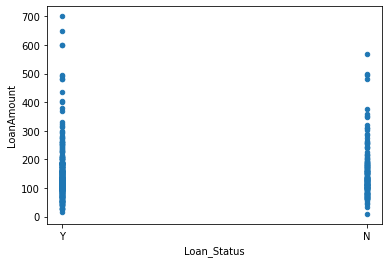

In [0]:
df.plot.scatter(x= 'Loan_Status',y= 'LoanAmount')

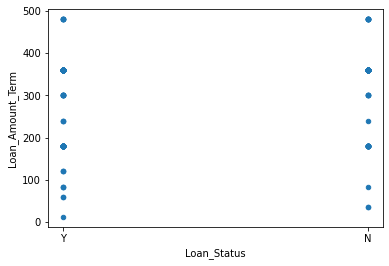

In [0]:
df.plot.scatter(x= 'Loan_Status',y= 'Loan_Amount_Term')

**Problem 6-** How is the class distribution (Y/N) in Label(Target) Variable ?

In [0]:
df.groupby('Loan_Status').count()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_Status,,,,,,,,,,,,
N,192,187,192,186,192,183,192,192,181,186,179,192
Y,422,414,419,413,422,399,422,422,411,414,385,422


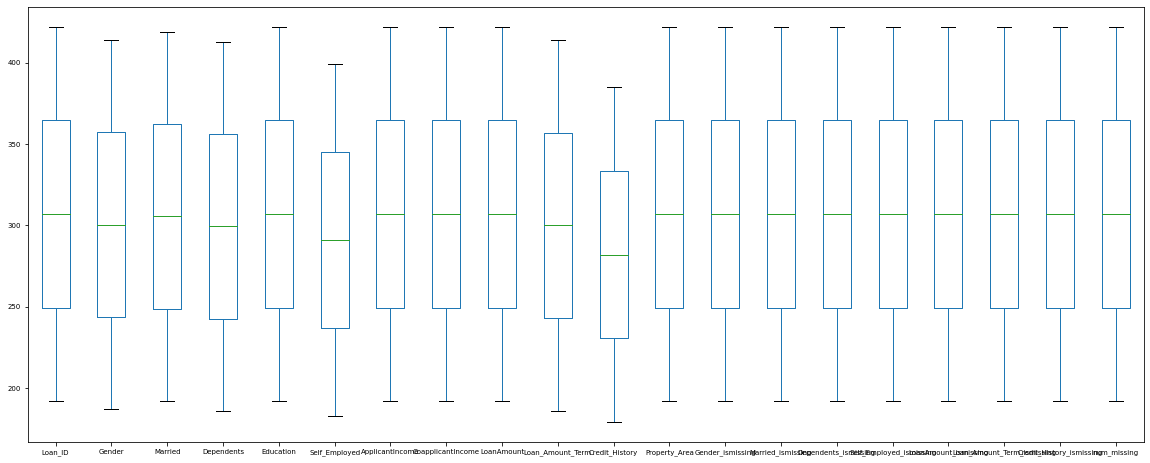

In [0]:
df.groupby('Loan_Status').count().plot.box(figsize=[20,8], fontsize=7)

In [0]:
corr = df.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


**Problem 7-** Identify the Independent Variables that have missing values

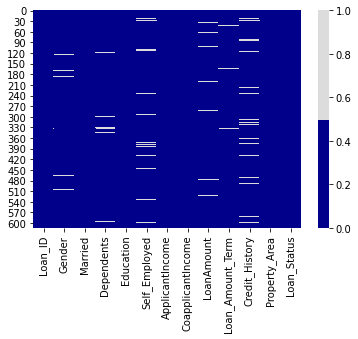

In [0]:
cols = df.columns[:] 
colours = ['#800000', '#DCDCDC'] # specify the colours - chartreuse is missing. brown is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

**Problem 8-** Handle missing values appropriately , explain the technique applied for each case

In [0]:
# Replace values with NaN
df.replace('male', np.nan)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
# Replace values with NaN
df['Gender'].replace('male', np.nan)
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

created missing indicator for: Gender
created missing indicator for: Married
created missing indicator for: Dependents
created missing indicator for: Self_Employed
created missing indicator for: LoanAmount
created missing indicator for: Loan_Amount_Term
created missing indicator for: Credit_History


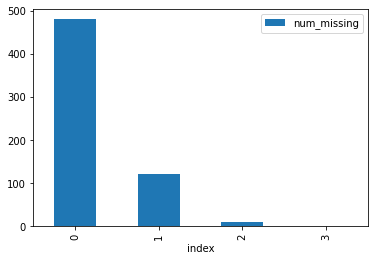

In [0]:
#Missing data Histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [0]:
#Impute the observation
# replace missing values with the median.
print("values before imputing")
for j in df['LoanAmount']:
    print(j)
med = df['LoanAmount'].median()
print("Median")
print(med)
df['LoanAmount'] = df['LoanAmount'].fillna(med)
print("values after imputing")
for k in df['LoanAmount']:
    print(k)

values before imputing
128.0
128.0
66.0
120.0
141.0
267.0
95.0
158.0
168.0
349.0
70.0
109.0
200.0
114.0
17.0
125.0
100.0
76.0
133.0
115.0
104.0
315.0
116.0
112.0
151.0
191.0
122.0
110.0
35.0
120.0
201.0
74.0
106.0
114.0
320.0
128.0
100.0
144.0
184.0
110.0
80.0
47.0
75.0
134.0
96.0
88.0
44.0
144.0
120.0
144.0
100.0
120.0
112.0
134.0
286.0
97.0
96.0
135.0
180.0
144.0
120.0
99.0
165.0
128.0
116.0
258.0
126.0
312.0
125.0
136.0
172.0
97.0
81.0
95.0
187.0
113.0
176.0
110.0
180.0
130.0
111.0
128.0
167.0
265.0
50.0
136.0
99.0
104.0
210.0
175.0
131.0
188.0
81.0
122.0
25.0
128.0
137.0
50.0
115.0
131.0
133.0
151.0
128.0
128.0
160.0
100.0
225.0
120.0
216.0
94.0
136.0
139.0
152.0
128.0
118.0
185.0
154.0
85.0
175.0
259.0
180.0
44.0
137.0
81.0
194.0
93.0
370.0
128.0
160.0
182.0
650.0
74.0
70.0
25.0
102.0
290.0
84.0
88.0
242.0
129.0
185.0
168.0
175.0
122.0
187.0
100.0
70.0
30.0
225.0
125.0
118.0
152.0
244.0
113.0
50.0
600.0
160.0
187.0
120.0
255.0
98.0
275.0
121.0
158.0
75.0
182.0
112.0
129.0
63.0
200

**Problem 9-** Identify the Outliers in each Independent Variable.Distribute the data in each field using Quartile bins (0-25%,25%-50%,50%-75%,75%-100% iles)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2f315208>]],
      dtype=object)

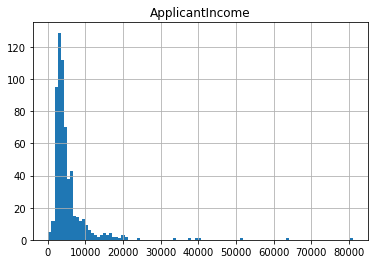

In [0]:
df.hist('ApplicantIncome', bins=100)

In [0]:
df['ApplicantIncome'].describe()


count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2effe748>]],
      dtype=object)

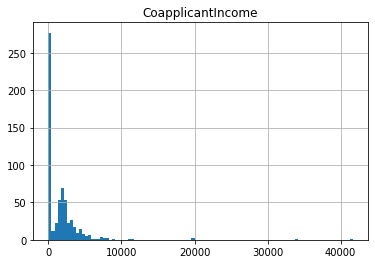

In [0]:
df.hist('CoapplicantIncome', bins=100)

In [0]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b2f01ef98>]],
      dtype=object)

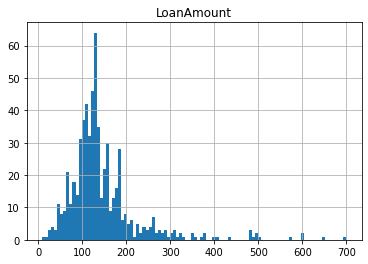

In [0]:
df.hist('LoanAmount', bins=100)


In [0]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

**Problem 10-** Use Box-Plot chart to represent the Outliers for each Independent Variable

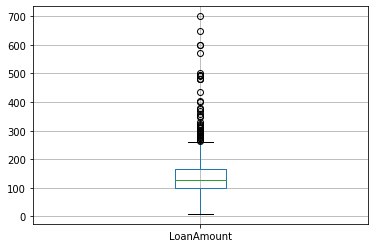

In [0]:
df.boxplot(column=['LoanAmount'])

In [0]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

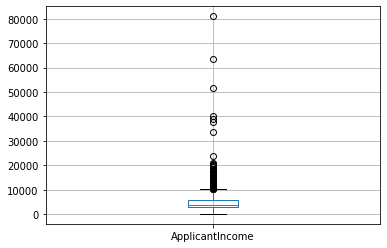

In [0]:
df.boxplot(column=['ApplicantIncome'])

In [0]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

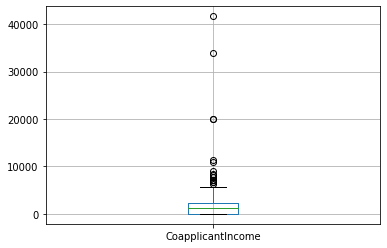

In [0]:
df.boxplot(column=['CoapplicantIncome'])

In [0]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

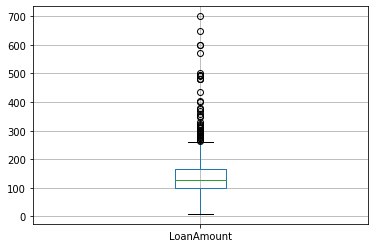

In [0]:
df.boxplot(column=['LoanAmount'])

In [0]:
df['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

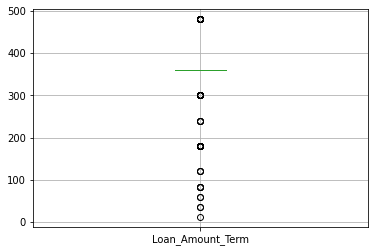

In [0]:
df.boxplot(column=['Loan_Amount_Term'])

In [0]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

**Step1 :-** Perform Label Encoding on Target Variable (Loan_Status).

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing,num_missing
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,False,False,False,False,True,False,False,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,False,False,False,False,False,False,False,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,False,False,False,False,False,False,False,0



**Step-2**

**a)** Perform Label Encoding on Categorical Independent Variables.

**b)** What is the shape of dataframe post Categorical Encoding ?

In [157]:
cat=df.select_dtypes(exclude=['int', 'float'])
cat.shape

(614, 14)

**c)** Carry out Correlation analysis on this dataframe. Plot using HeatMap

In [141]:
corr = df.corr()
corr.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing,num_missing,dfLoan_ID
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045306,-0.014715,-0.004710,0.118787,0.009224,-0.005596,0.017661,-0.000718,-0.031836,-0.034651,0.013174,0.016925
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059878,-0.002056,-0.059187,-0.007825,-0.032830,-0.029503,0.075084,-0.037945,0.005756,0.104297,0.063492,0.039211
LoanAmount,0.565181,0.189218,1.000000,0.039358,-0.007543,-0.033214,0.109880,0.002430,-0.032800,0.019960,-0.040722,-0.053690,0.051967,0.028607,0.036872
Loan_Amount_Term,-0.045306,-0.059878,0.039358,1.000000,0.001470,-0.021268,-0.001056,0.019611,0.032579,-0.018747,-0.011449,NaN,-0.007785,-0.004887,-0.029301
Credit_History,-0.014715,-0.002056,-0.007543,0.001470,1.000000,0.561678,-0.037289,0.031654,-0.079589,0.071965,-0.017626,-0.118501,NaN,-0.055780,-0.033772


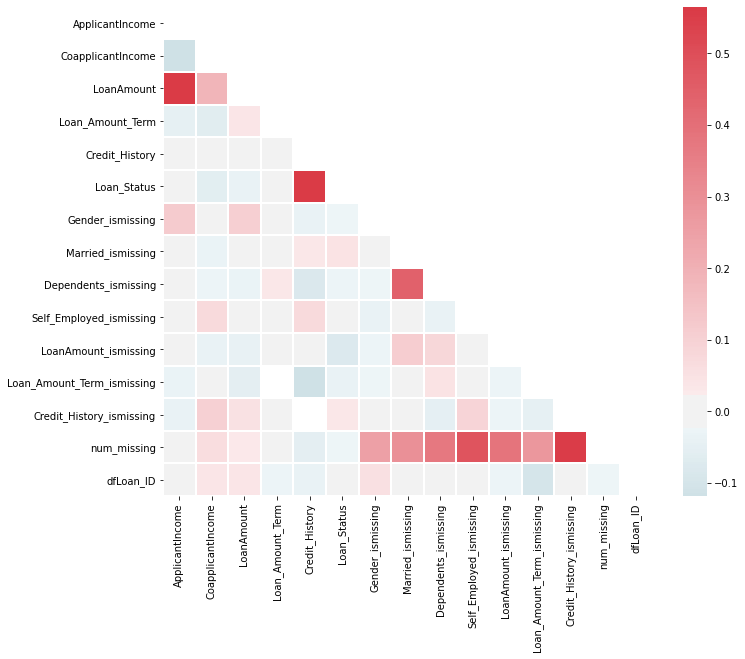

In [145]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=1, cbar_kws={"shrink": 1})
figure = svm.get_figure()

**d)** Identify the variables that have strong correlation using Label Encoding( Correlation Coefficient > 0.5 or <0.5)

**Step-3**

**a)** Perform One Hot Encoding on Categorical Independent Variables.

In [168]:
df_ohe=df.select_dtypes(exclude=['int', 'float'])
print(df_ohe)

      Loan_ID  Gender  ... Loan_Amount_Term_ismissing Credit_History_ismissing
0    LP001002    Male  ...                      False                    False
1    LP001003    Male  ...                      False                    False
2    LP001005    Male  ...                      False                    False
3    LP001006    Male  ...                      False                    False
4    LP001008    Male  ...                      False                    False
..        ...     ...  ...                        ...                      ...
609  LP002978  Female  ...                      False                    False
610  LP002979    Male  ...                      False                    False
611  LP002983    Male  ...                      False                    False
612  LP002984    Male  ...                      False                    False
613  LP002990  Female  ...                      False                    False

[614 rows x 14 columns]



**b)** What is the shape of dataframe post OHE Encoding ?


In [175]:
a=df_ohe.shape
a

(614, 14)

In [176]:
ohe_Corr= df_ohe.corr()
ohe_Corr.head()

,Gender_ismissing,Married_ismissing,Dependents_ismissing,Self_Employed_ismissing,LoanAmount_ismissing,Loan_Amount_Term_ismissing,Credit_History_ismissing
Gender_ismissing,1.000000,-0.010306,-0.023274,-0.034486,-0.028352,-0.022466,-0.002425
Married_ismissing,-0.010306,1.000000,0.442800,-0.016431,0.112157,-0.010704,-0.020863
Dependents_ismissing,-0.023274,0.442800,1.000000,-0.037106,0.083013,0.046503,-0.047117
Self_Employed_ismissing,-0.034486,-0.016431,-0.037106,1.000000,-0.005779,0.013272,0.090936
LoanAmount_ismissing,-0.028352,0.112157,0.083013,-0.005779,1.000000,-0.029447,-0.025359


**c)** Carry out Correlation analysis on this dataframe. Plot using HeatMap

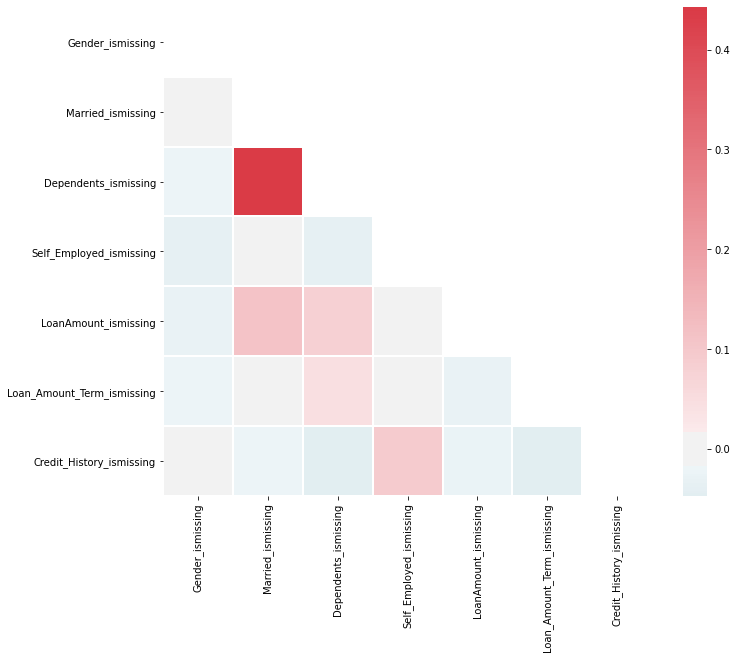

In [174]:
mask = np.zeros_like(ohe_Corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

svm = sns.heatmap(ohe_Corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1})
figure = svm.get_figure()

**d)** Identify the variables that have strong correlation using OHE ( Correlation Coefficient > 0.5 or <0.5)